In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os

import numpy as np
import pandas as pd
import pyDAW

# 分别控制文件数量和电压
raw_filess = [
    [
        f"/home/daq/daq_2730/CoMPASS-v2.4.1/SiPM_VUV4/DAQ/VBias{i}/RAW/DataR_CH0@VX2730_53013_VBias{i}_{j}.CSV"
        for j in range(1, 3)
    ]
    for i in range(55, 64)
]

# 读取 CSV 文件，其中分隔符为 ';'
waveforms = []
for raw_files in raw_filess:
    df_combine = []
    for raw_file in raw_files:
        df = pd.read_csv(raw_file, delimiter=";", skiprows=2)
        if df.isna().any().any():
            print(f"文件 {raw_file} 存在 NaN 值")
            # 根据具体需求，可以选择填充或删除缺失值
            # 例如：填充缺失值为 0
            # df = df.fillna(0)
            # 或者删除含有缺失值的行
            df = df.dropna()
        df_combine.append(df)

    array = [df.to_numpy() for df in df_combine]
    waveform = np.concatenate(array, axis=0)
    waveforms.append(waveform)

(array([ 972.,  993.,  981.,  992., 1040., 1030.,  984., 1007., 1005.,
         996.]),
 array([2.84054138e+11, 2.85442849e+11, 2.86831560e+11, 2.88220271e+11,
        2.89608983e+11, 2.90997694e+11, 2.92386405e+11, 2.93775116e+11,
        2.95163827e+11, 2.96552538e+11, 2.97941249e+11]),
 <BarContainer object of 10 artists>)

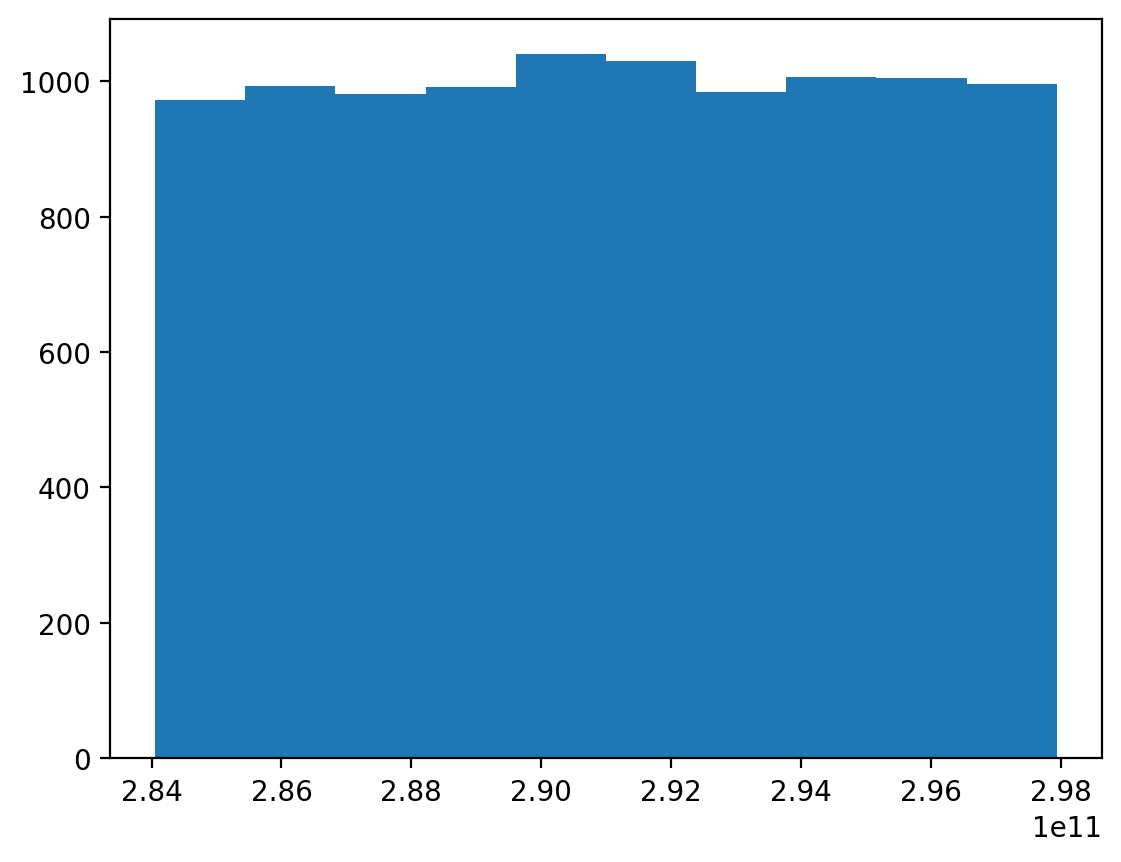

In [ ]:
time = [waveforms[0][i][2] for i in range(10000)]
plt.hist(time)

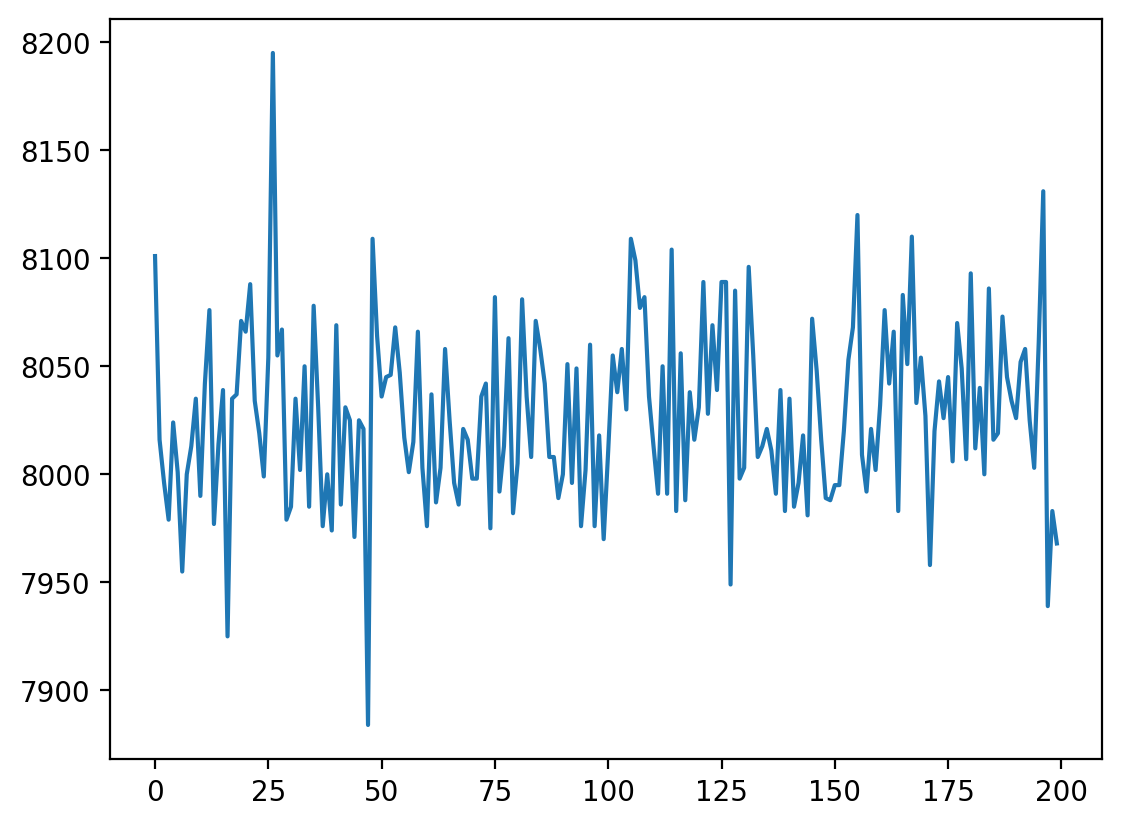

In [ ]:
plt.plot(waveforms[0][0][7:])

(406641, 207)

In [ ]:
def find_consecutive_positive(arr, num=4, thr=3):
    """
    找到数组中连续三个大于零的部分。

    参数：
    arr (np.ndarray): 输入数组。

    返回：
    np.ndarray: 连续三个大于零的部分的起始索引。
    """

    # 创建一个卷积核，用于检测连续三个正数
    kernel = np.full(num, 1)

    # 将数组转换为布尔数组，True 表示大于零，False 表示小于等于零
    positive_arr = arr < thr

    # 使用卷积操作检测连续三个 True
    convolved = np.convolve(positive_arr, kernel, mode="valid")

    # 找到卷积结果等于 3 的位置，这些位置表示连续三个 True
    indices = np.where(convolved == num)[0]

    return indices


# 示例数据
arr = np.array([1, 2, 3, -1, -4, -5, 6, -2, 7, 8, 9])

# 找到连续三个大于零的部分
indices = find_consecutive_positive(arr)

# 打印结果
print(f"连续三个大于零的部分的起始索引：{indices}")

连续三个大于零的部分的起始索引：[]


(80.0, 150.0)

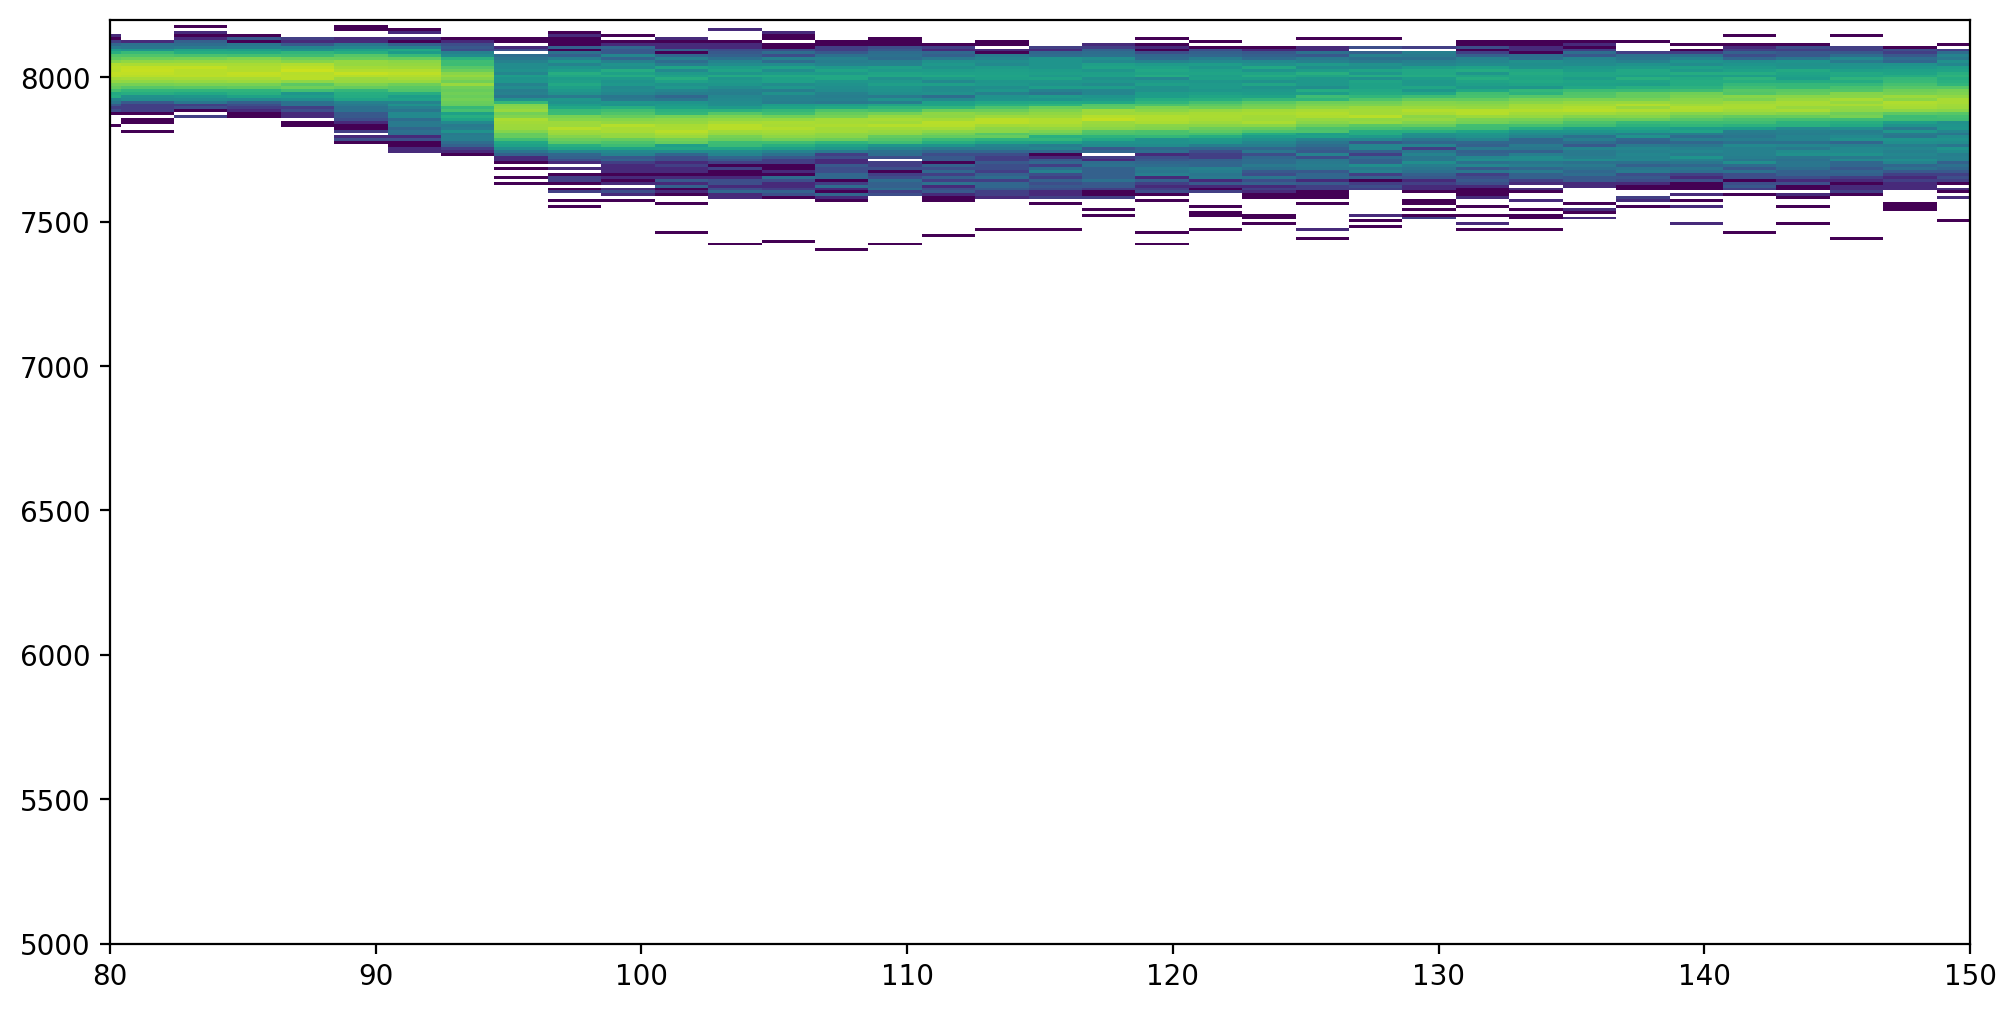

In [ ]:
%config InlineBackend.figure_format = 'retina'
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

num = 2000
a = []
for i in range(num):
    a.append(np.linspace(2, 400, 200))
    b = np.array(object=a).flatten()


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
hist = ax.hist2d(
    b,
    waveform[:num, :].flatten(),
    bins=[np.linspace(0, 400, 200), np.linspace(5000, 8200, 320)],
    norm=LogNorm(),
)

# Save the histogram data (counts, edges)
counts, xedges, yedges, obj = hist
# hist_data.append({"counts": counts, "xedges": xedges, "yedges": yedges})

# ax.set_xlabel("Time [ns]")
# ax.set_ylabel("ADC")
# ax.set_title(f"VBias {54 + j}")

plt.xlim(80, 150)

In [ ]:
np.diff(waveform[:num, 7:], axis=1).shape

(2000, 192)

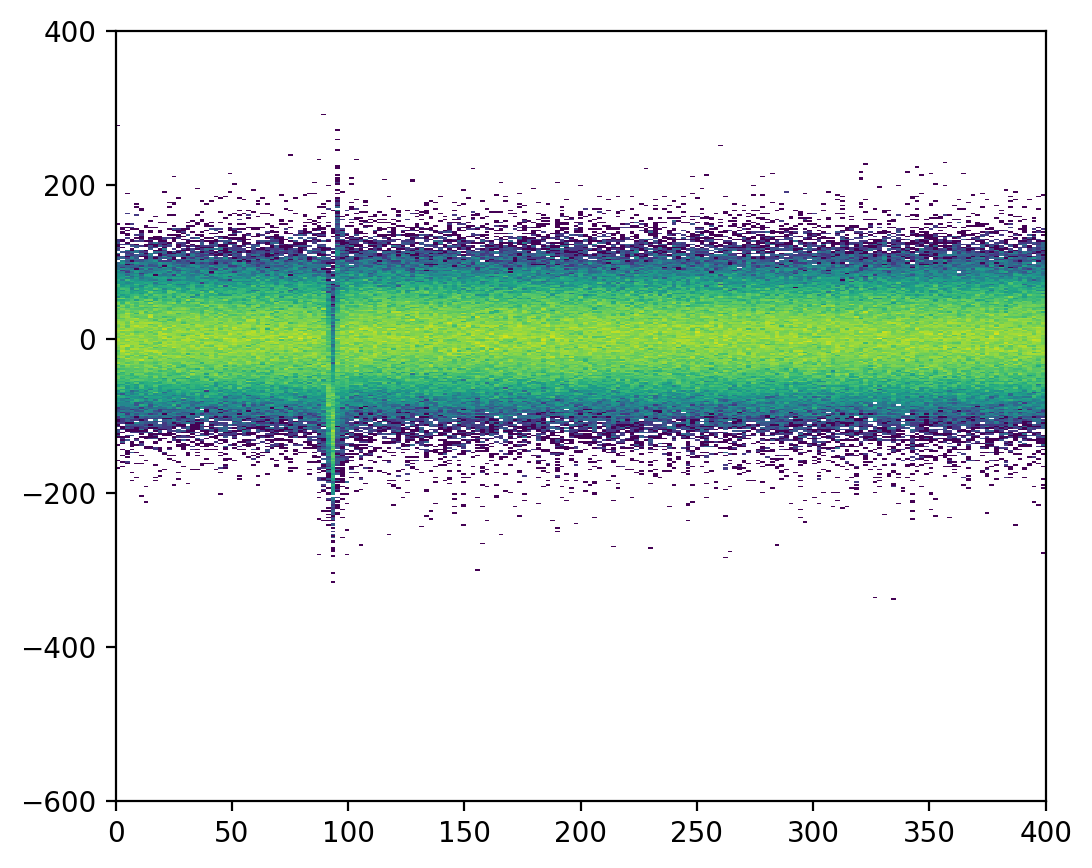

In [22]:
%config InlineBackend.figure_format = 'retina'
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

num = 2000
a = []
for i in range(num):
    a.append(np.linspace(2, 400, 199))
    b = np.array(object=a).flatten()


fig, ax = plt.subplots(1, 1, figsize=(6, 5))
hist = ax.hist2d(
    b,
    np.diff(waveforms[0][:num, 7:], axis=1).flatten(),
    bins=[np.linspace(0, 400, 200), np.linspace(-600, 400, num=500)],
    norm=LogNorm(),
)

# plt.xlim(50,150)

(35.0, 60.0)

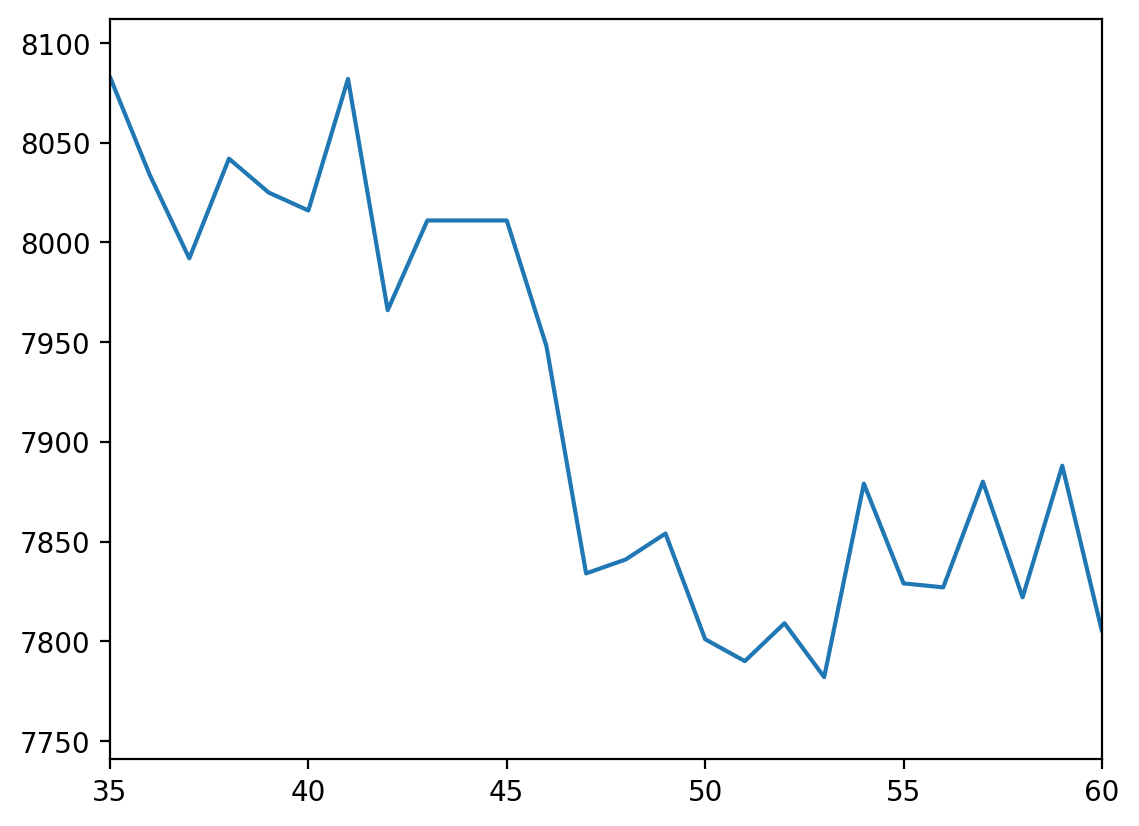

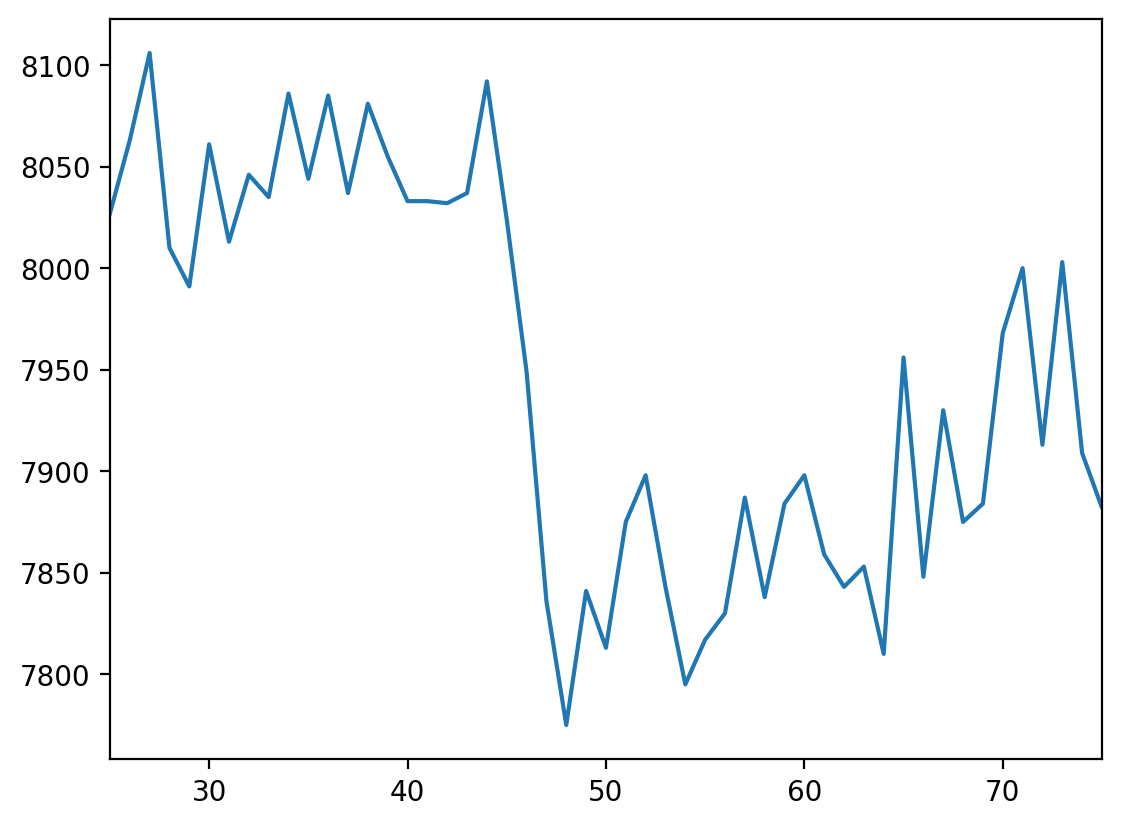

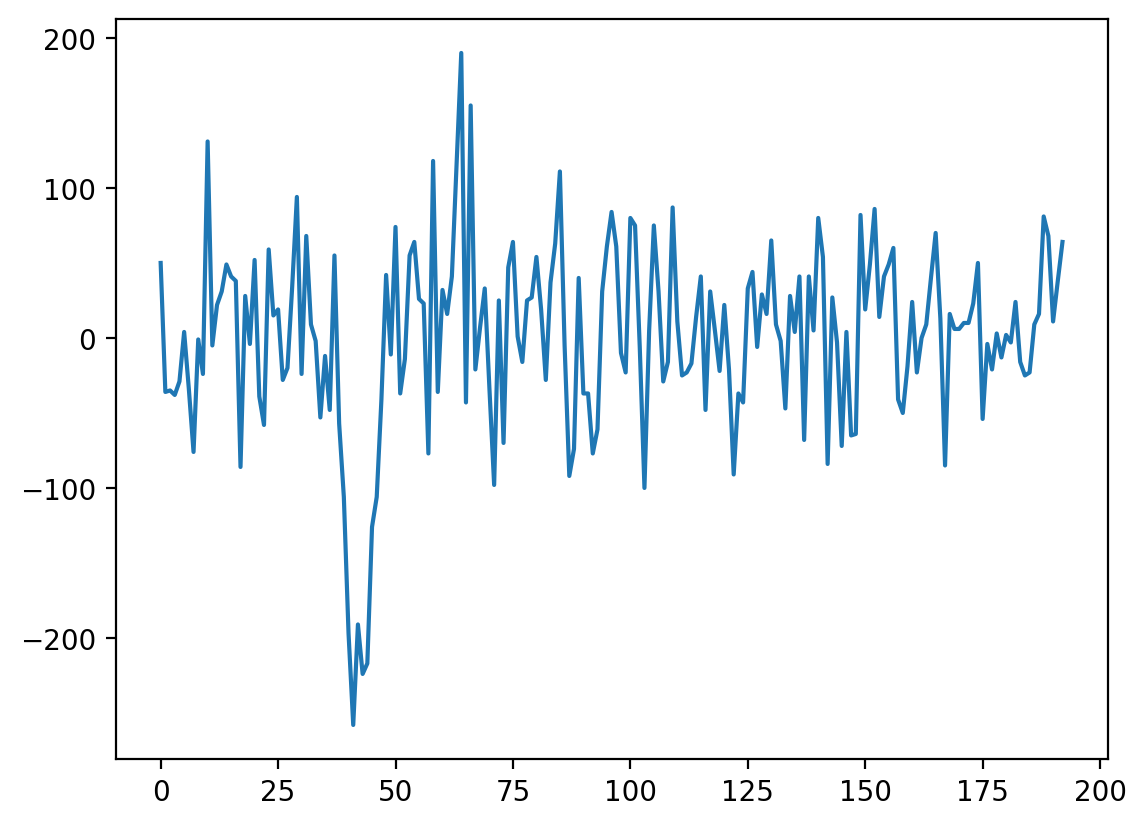

In [ ]:
rand = np.random.randint(0, 10000)

plt.plot(waveforms[0][rand, 7:])
plt.xlim(25, 75)
plt.figure()

data = waveforms[0][rand, 7:]

offset = 7

difference = np.zeros(len(data) - offset)
difference = data[offset:] - data[:-offset]

plt.plot(difference)

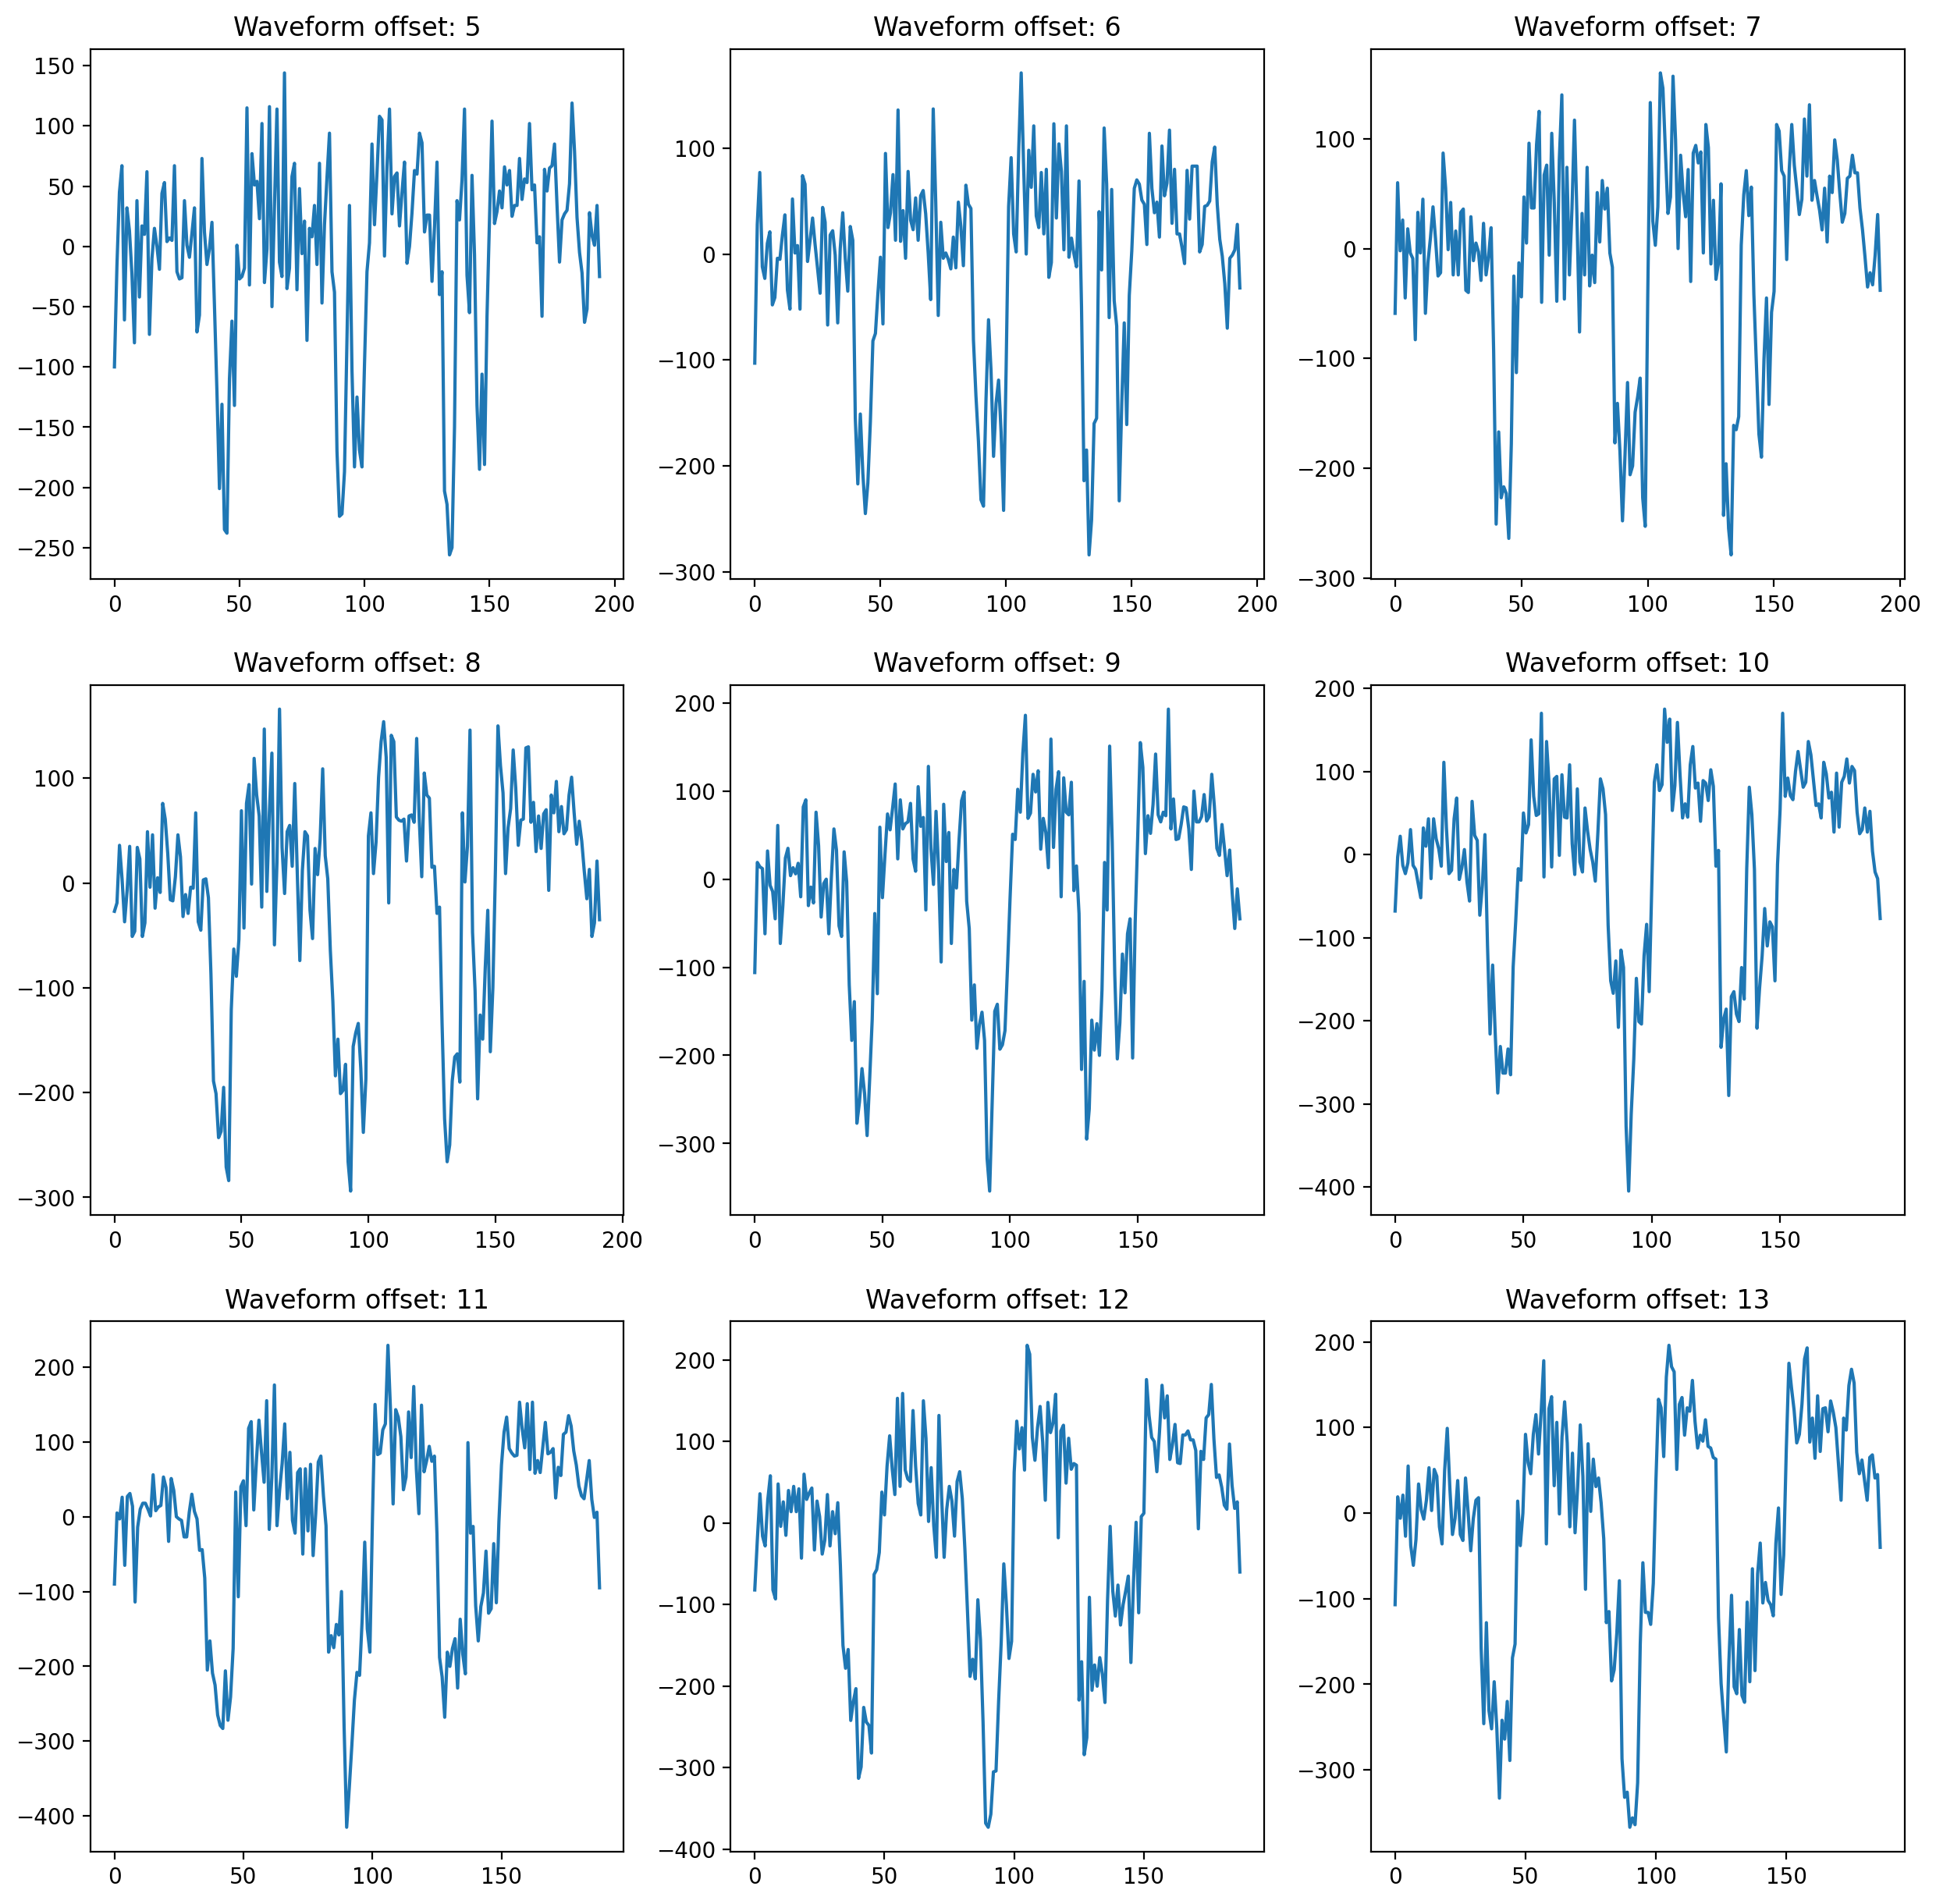

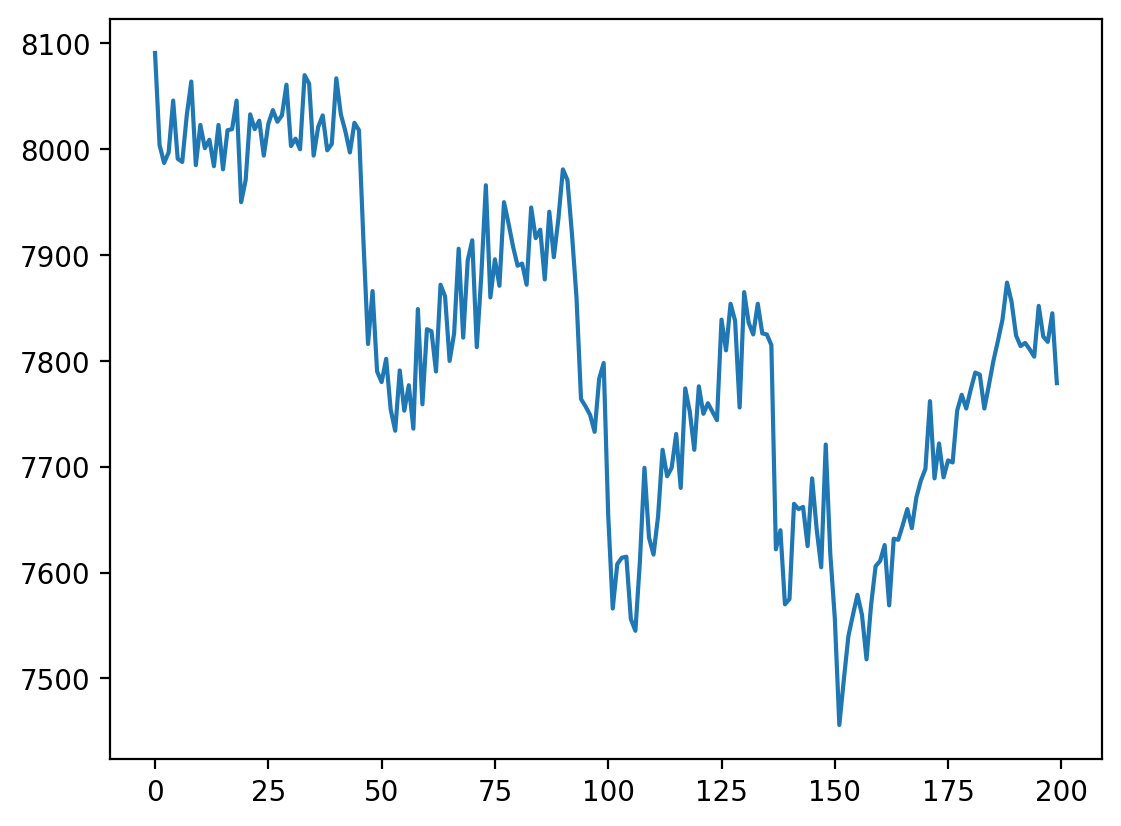

In [ ]:
rand = np.random.randint(0, 10000)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for j in range(9):  # 限制循环范围
    rows = j // 3
    cols = j % 3

    data = waveforms[0][rand, 7:]

    offset = j + 5

    difference = np.zeros(len(data) - offset)
    difference = data[offset:] - data[:-offset]

    axes[rows, cols].plot(difference)
    axes[rows, cols].title.set_text(f"Waveform offset: {offset}")

plt.figure()
plt.plot(waveforms[0][rand, 7:])

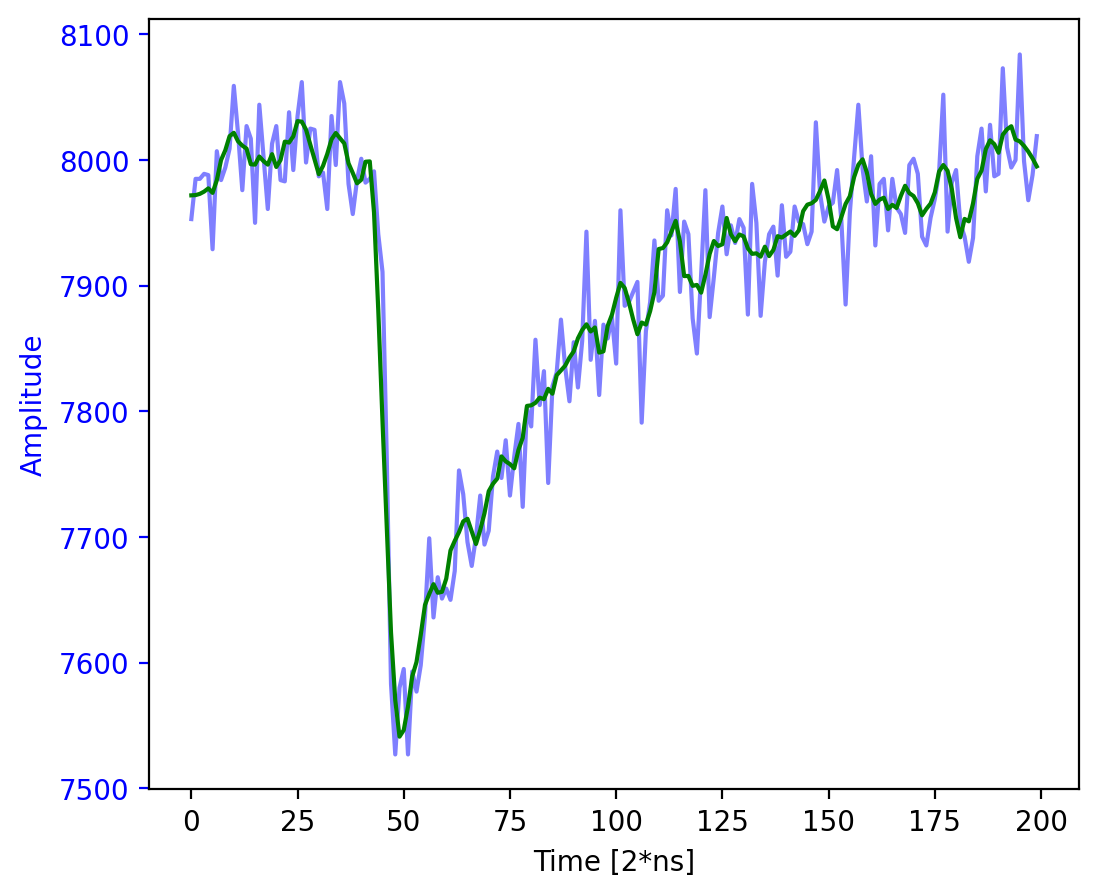

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# 创建一个figure和axis对象
fig, ax1 = plt.subplots(figsize=(6, 5))

# 假设 waveforms 是预先定义的数组或列表（在实际代码中应替换）
waveform = waveforms[4]
rand = np.random.randint(0, 2000)
wave = waveform[rand, 7:]

# 对原始波形应用Savitzky-Golay滤波
window_size = 10
poly_order = 2
smooth_wave = savgol_filter(wave, window_size, poly_order)

# 画出原始波形
ax1.plot(wave.flatten(), label="Raw Signal", color="blue", alpha=0.5)
ax1.plot(smooth_wave.flatten(), label="Smoothed Signal", color="green")
ax1.set_xlabel("Time [2*ns]")
ax1.set_ylabel("Amplitude", color="blue")
ax1.tick_params("y", colors="blue")

# # 创建第二个y轴，共享x轴
# ax2 = ax1.twinx()

# # 计算原始波形的一阶导数
# diff_waveform = np.diff(wave, axis=0).flatten()
# # 计算滤波后波形的一阶导数
# diff_smooth_wave = np.diff(smooth_wave, axis=0).flatten()

# # 应用Savitzky-Golay滤波到一阶导数
# smooth_diff_waveform = savgol_filter(diff_waveform, window_size, poly_order)
# smooth_diff_smooth_wave = savgol_filter(diff_smooth_wave, window_size, poly_order)

# # 画出一阶导数（原始和滤波后的）
# ax2.plot(diff_waveform, color="red", label="Diff of Raw Signal", linestyle='-', alpha=0.6)
# ax2.plot(smooth_diff_waveform, color="purple", label="Smoothed Diff of Raw Signal", linestyle='-.')
# ax2.plot(diff_smooth_wave, color="orange", label="Diff of Smoothed Signal", linestyle='-', alpha=0.6)
# ax2.plot(smooth_diff_smooth_wave, color="black", label="Smoothed Diff of Smoothed Signal", linestyle='--')

# ax2.set_ylabel("First Derivative", color="red")
# ax2.tick_params("y", colors="red")

# # # 添加图例
# # ax1.legend(loc='upper left', bbox_to_anchor=(0.15, 1.08), frameon=False)  # 移除边框
# # ax2.legend(loc='upper right', bbox_to_anchor=(0.85, 1.08), frameon=False)  # 移除边框

# plt.title("Waveform and its Derivative", x=0.5, y=1.1)
plt.show()

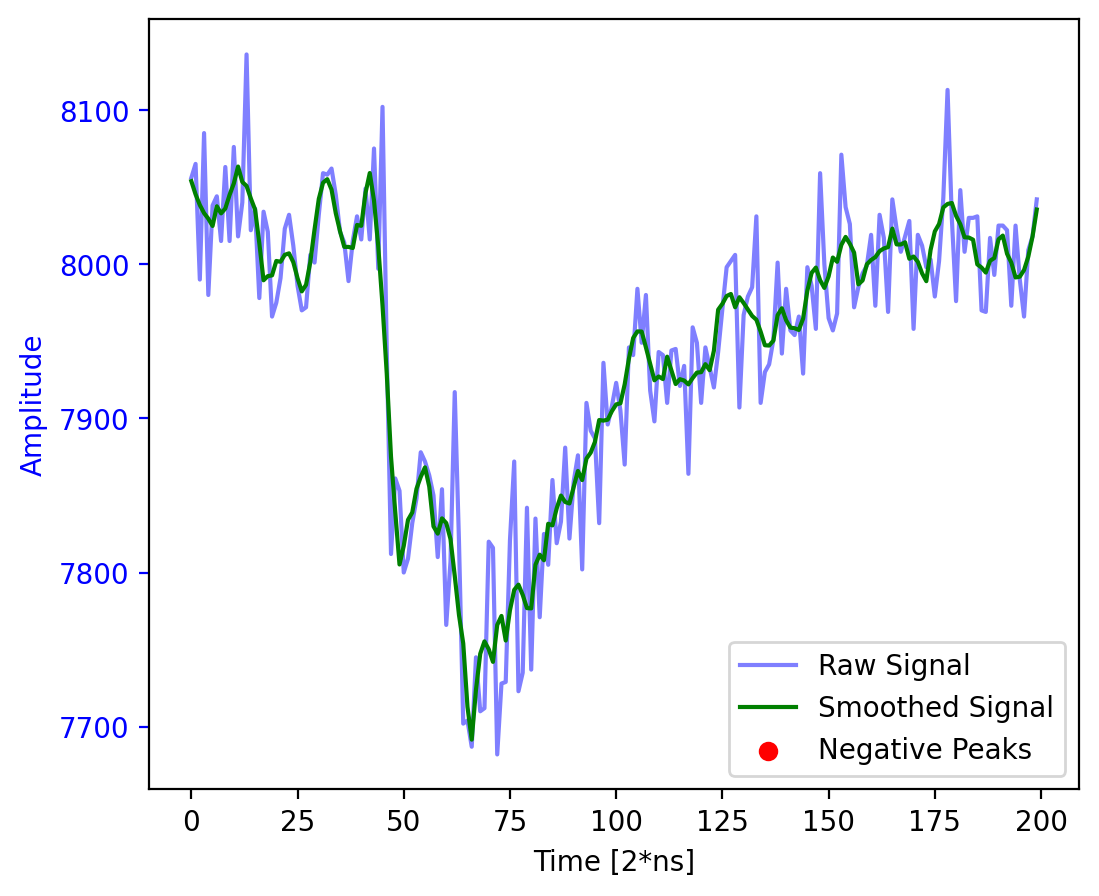

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, savgol_filter

# 创建一个figure和axis对象
fig, ax1 = plt.subplots(figsize=(6, 5))

# 假设 waveforms 是预先定义的数组或列表（在实际代码中应替换）
waveform = waveforms[0]
rand = np.random.randint(0, 2000)

wave = waveform[rand, 7:]

# 对原始波形应用Savitzky-Golay滤波
window_size = 10
poly_order = 2


smooth_wave = savgol_filter(wave, window_size, poly_order)


# 画出原始波形
ax1.plot(wave.flatten(), label="Raw Signal", color="blue", alpha=0.5)
ax1.plot(smooth_wave.flatten(), label="Smoothed Signal", color="green")

# 找到负峰值
peaks, _ = find_peaks(
    -smooth_wave,
    height=0,  # 最小高度
    prominence=0.4,  # 最小突出度
    threshold=0,  # 最小阈值
    distance=20,  # 最小峰间距
    width=5,  # 最小峰宽
    # rel_height=0.5  # 相对高度
)

# 标出负峰值
ax1.scatter(peaks, smooth_wave[peaks], color="red", label="Negative Peaks")

# 设置标签和标题
ax1.set_xlabel("Time [2*ns]")
ax1.set_ylabel("Amplitude", color="blue")
ax1.tick_params("y", colors="blue")

# 显示图例
ax1.legend()


# 显示图像
plt.show()

## 构建新的分析的类


In [ ]:
from scipy.signal import find_peaks

In [ ]:
from typing import Union

import numpy as np
from scipy.signal import butter, filtfilt, find_peaks, savgol_filter


class Waver:
    peak_dtype = np.dtype([("position", int), ("height", float), ("integral", float)])

    def __init__(self, waveform: np.ndarray):
        self.waveform = waveform  # 原始波形
        self.filtered_waveform = None  # 滤波后的波形
        self.filtered_waveform_diff = None  # 滤波后的波形的一阶导数
        # 定义峰值信息的结构

        self.peaks_info = None  # 存储峰值信息（位置、峰高、积分）

    def waveform_filter(self, lowcut=0.1, highcut=0.5, fs=1.0, order=4, filter="SG"):
        """
        对波形进行带通滤波或Savitzky-Golay滤波
        :param lowcut: 低频截止
        :param highcut: 高频截止
        :param fs: 采样率
        :param order: 滤波器阶数
        :param filter: 滤波类型，"BW"为带通滤波器，"SG"为Savitzky-Golay滤波器
        """
        if filter == "BW":
            # 创建带通滤波器（Butterworth滤波器）
            nyquist = 0.5 * fs
            low = lowcut / nyquist
            high = highcut / nyquist

            b, a = butter(order, [low, high], btype="band")
            # 应用带通滤波器
            self.filtered_waveform = filtfilt(b, a, self.waveform)

        elif filter == "SG":
            # 使用Savitzky-Golay滤波器
            window_size = 10
            poly_order = 2
            self.filtered_waveform = savgol_filter(self.waveform, window_size, poly_order)

        else:
            raise ValueError("filter must be 'BW' or 'SG'. You can add new ones by yourself.")

        self.filtered_waveform_diff = np.diff(self.filtered_waveform)

    def find_peaks(self, height=None, distance=None, threshold=None, prominence=None):
        """
        寻找波形中的峰值，并计算峰高和积分等信息
        :param height: 峰值的最小高度
        :param distance: 峰值之间的最小距离
        """
        # 使用 find_peaks 查找峰值索引和属性（如峰高）

        if self.filtered_waveform is None:
            self.filtered_waveform()

        # peaks, properties = find_peaks(
        #     waveform_used,
        #     height=height,
        #     distance=distance,
        #     threshold=threshold,
        #     prominence=prominence,
        # )
        filtered_waveform_diff = -np.diff(self.get_filtered_waveform())

        peaks, properties = find_peaks(
            -np.diff(filtered_waveform_diff), height=30, distance=2, prominence=0.7, width=4
        )

        # left_lens = peaks - properties["left_ips"]
        # right_lens = properties["right_ips"] - peaks

        starts = properties["left_ips"]
        ends = properties["right_ips"]
        peak_heights = self._peak_height_from_diff(starts, ends)

        peak_integrals = np.array([None for p in peaks])

        # 存储峰值信息（位置、峰高、积分）
        self.peaks_info = np.array(
            [(peaks[i], peak_heights[i], peak_integrals[i]) for i in range(len(peaks))],
            dtype=self.peak_dtype,
        )
        self.proeperties = properties
        # 更新 peaks 索引
        self.peaks = peaks

    def get_peaks(self):
        """
        获取当前的峰值信息（位置、峰高、积分等）
        :return: 包含峰值信息的数组
        """
        if self.peaks_info is None:
            self.find_peaks()
        return self.peaks_info

    def _peak_height_from_diff(self, starts, ends):
        """
        计算每个峰值的上升区间高度
        输入:
        - waveform: 1D数组，表示波形数据
        - peaks: 1D数组，表示多个峰值的位置索引
        - left_len: 左侧长度，用于计算上升区间的起始位置
        - right_len: 右侧长度，用于计算上升区间的结束位置

        输出:
        - peak_heights: 1D数组，每个峰值的上升区间高度
        """

        peak_heights = []

        for peak, start, end in zip(peaks, starts, ends):
            # 计算区间内的波形高度
            peak_height = np.sum(np.diff(-self.get_filtered_waveform())[start:end])
            peak_heights.append(peak_height)

        return np.array(peak_heights)

    def get_filtered_waveform(self):
        """
        获取滤波后的波形
        :return: 滤波后的波形
        """
        if self.filtered_waveform is None:
            self.waveform_filter()
        return self.filtered_waveform

In [ ]:
from typing import Union

import numpy as np
from scipy.signal import butter, filtfilt, find_peaks, savgol_filter


class Waver:
    peak_dtype = np.dtype([
        ("position", int),
        ("height", float),
        ("integral", float),
        ("edge_start", int),
        ("edge_end", int),
    ])

    def __init__(self, waveform: np.ndarray):
        self.waveform = waveform  # 原始波形
        self.filtered_waveform = None  # 滤波后的波形
        self.filtered_waveform_diff = None  # 滤波后的波形的一阶导数
        # 定义峰值信息的结构

        self.peaks_info = None  # 存储峰值信息（位置、峰高、积分）

    def waveform_filter(self, lowcut=0.1, highcut=0.5, fs=1.0, order=4, filter="SG"):
        """
        对波形进行带通滤波或Savitzky-Golay滤波
        :param lowcut: 低频截止
        :param highcut: 高频截止
        :param fs: 采样率
        :param order: 滤波器阶数
        :param filter: 滤波类型，"BW"为带通滤波器，"SG"为Savitzky-Golay滤波器
        """
        if filter == "BW":
            # 创建带通滤波器（Butterworth滤波器）
            nyquist = 0.5 * fs
            low = lowcut / nyquist
            high = highcut / nyquist

            b, a = butter(order, [low, high], btype="band")
            # 应用带通滤波器
            self.filtered_waveform = filtfilt(b, a, self.waveform)

        elif filter == "SG":
            # 使用Savitzky-Golay滤波器
            window_size = 10
            poly_order = 2
            self.filtered_waveform = savgol_filter(self.waveform, window_size, poly_order)

        else:
            raise ValueError("filter must be 'BW' or 'SG'. You can add new ones by yourself.")

        self.filtered_waveform_diff = np.diff(self.filtered_waveform)

    def find_peaks(self, height=None, distance=None, threshold=None, prominence=None):
        """
        寻找波形中的峰值，并计算峰高和积分等信息
        :param height: 峰值的最小高度
        :param distance: 峰值之间的最小距离
        """
        # 使用 find_peaks 查找峰值索引和属性（如峰高）

        if self.filtered_waveform is None:
            self.filtered_waveform()

        # peaks, properties = find_peaks(
        #     waveform_used,
        #     height=height,
        #     distance=distance,
        #     threshold=threshold,
        #     prominence=prominence,
        # )
        filtered_waveform_diff = -np.diff(self.get_filtered_waveform())

        peaks, properties = find_peaks(
            filtered_waveform_diff, height=30, distance=2, prominence=0.7, width=4
        )

        # left_lens = peaks - properties["left_ips"]
        # right_lens = properties["right_ips"] - peaks

        # starts = int(np.round(properties["left_ips"]))
        # ends = int(np.round(properties["right_ips"]))
        starts = [int(np.round(start)) for start in properties["left_ips"]]
        ends = [int(np.round(end)) for end in properties["right_ips"]]
        peak_heights = self._peak_height_from_diff(starts, ends)

        peak_integrals = np.array([None for p in peaks])

        # 存储峰值信息（位置、峰高、积分）
        self.peaks_info = np.array(
            [
                (
                    peaks[i],
                    peak_heights[i],
                    peak_integrals[i],
                    properties["left_ips"][i],
                    properties["right_ips"][i],
                )
                for i in range(len(peaks))
            ],
            dtype=self.peak_dtype,
        )
        self.proeperties = properties
        # 更新 peaks 索引
        self.peaks = peaks

    def get_peaks(self):
        """
        获取当前的峰值信息（位置、峰高、积分等）
        :return: 包含峰值信息的数组
        """
        if self.peaks_info is None:
            self.find_peaks()
        return self.peaks_info

    def _peak_height_from_diff(self, starts: Union[int, list[int]], ends: Union[int, list[int]]):
        peak_heights = []

        for start, end in zip(starts, ends):
            # 计算区间内的波形高度

            peak_height = np.sum(np.diff(-self.get_filtered_waveform())[start:end])
            peak_heights.append(peak_height)

        return np.array(peak_heights)

    def get_filtered_waveform(self):
        """
        获取滤波后的波形
        :return: 滤波后的波形
        """
        if self.filtered_waveform is None:
            self.waveform_filter()
        return self.filtered_waveform

array([(45, 381.75625, nan, 41, 47)],
      dtype=[('position', '<i8'), ('height', '<f8'), ('integral', '<f8'), ('edge_start', '<i8'), ('edge_end', '<i8')])

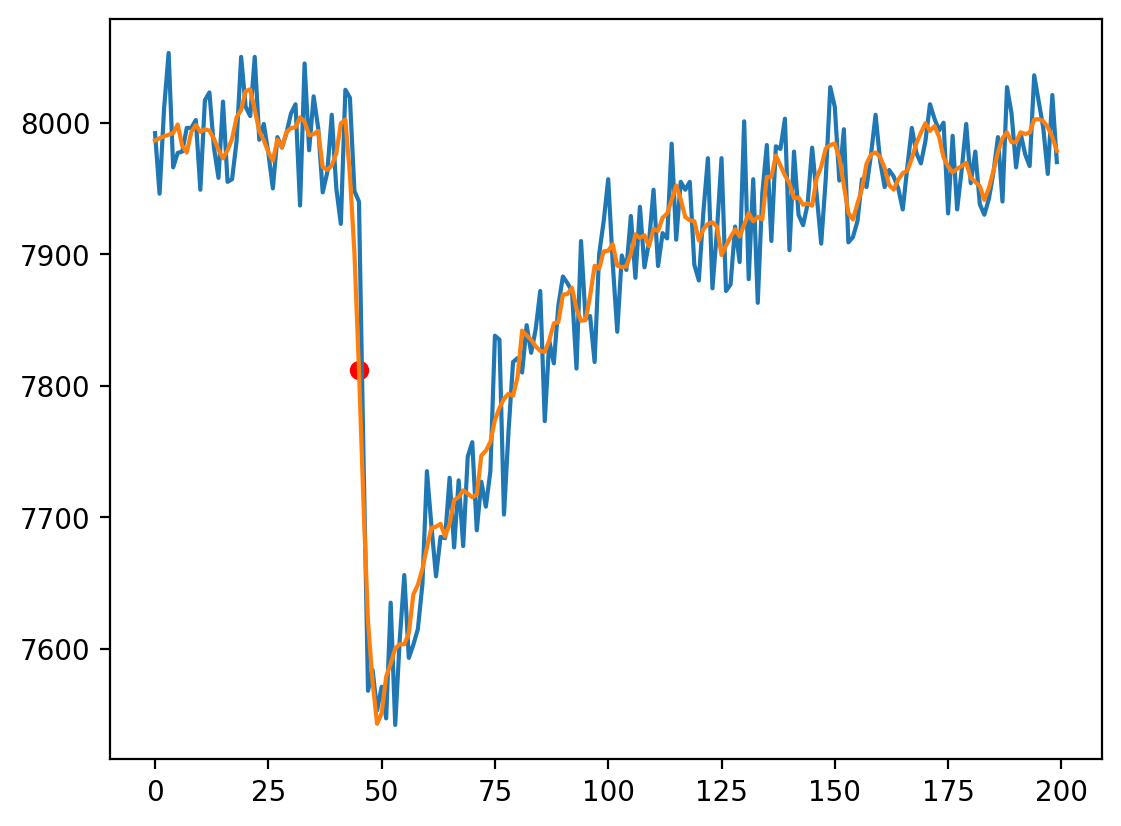

In [ ]:
wave1 = Waver(waveforms[4][np.random.randint(10000), 7:])
wave1.get_filtered_waveform()

plt.plot(wave1.waveform)
plt.plot(wave1.get_filtered_waveform())
# 寻找峰值并计算峰高和积分
wave1.find_peaks(
    height=100,
    distance=20,
    prominence=0.7,
    threshold=2,
)

plt.scatter(
    wave1.get_peaks()["position"],
    [wave1.get_filtered_waveform()[pos] for pos in wave1.get_peaks()["position"]],
    color="red",
)

display(wave1.peaks_info)

array([],
      dtype=[('position', '<i8'), ('height', '<f8'), ('integral', '<f8')])

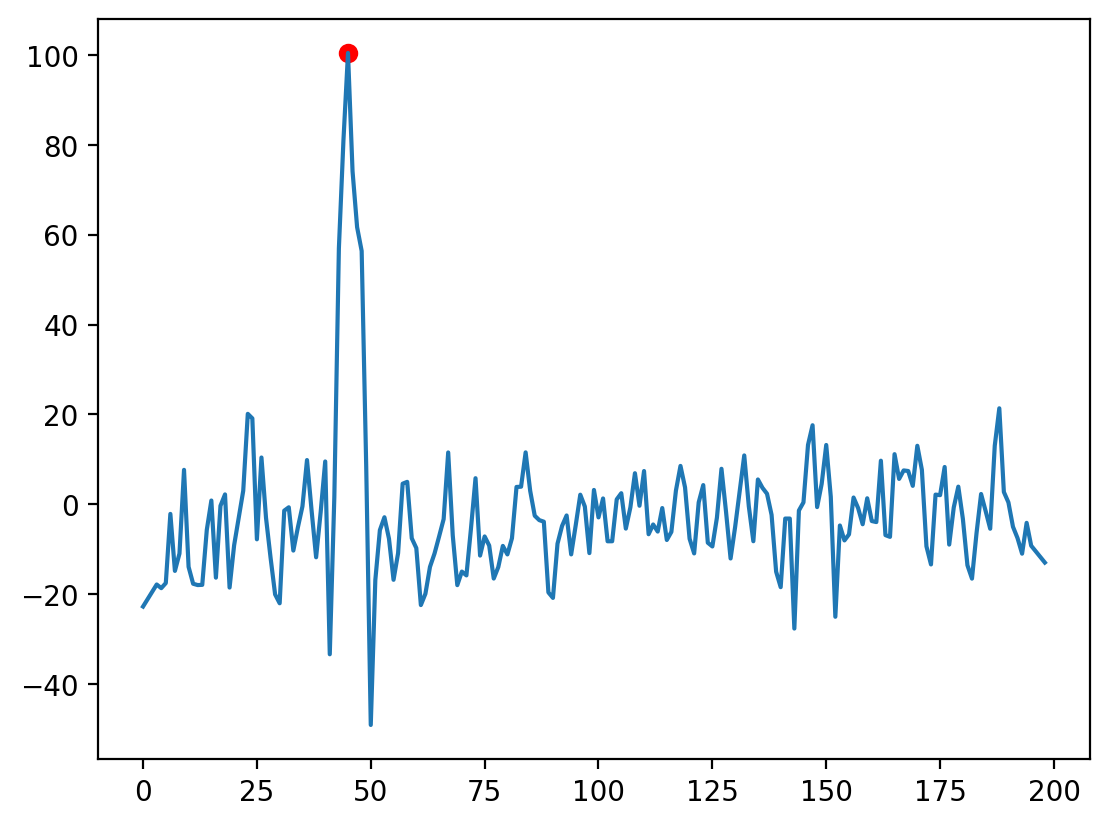

In [ ]:
plt.plot(-np.diff(wave1.get_filtered_waveform()))


a = find_peaks(
    -np.diff(wave1.get_filtered_waveform()), height=30, distance=2, prominence=0.7, width=4
)

wave1.find_peaks()
display(wave1.peaks_info)
plt.scatter(a[0], a[1]["peak_heights"], color="red")

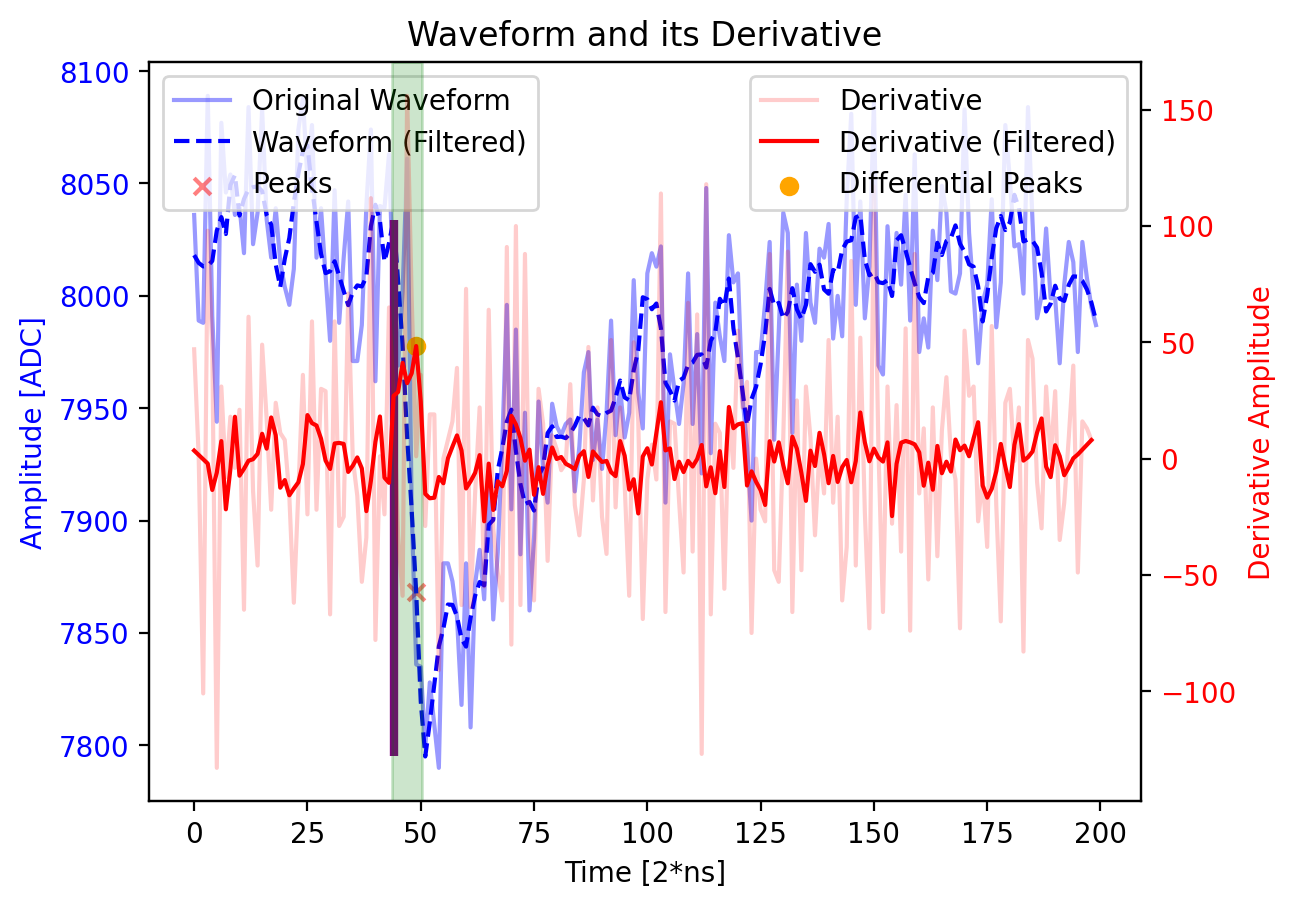

In [127]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import numpy as np
from scipy.signal import find_peaks

# 假设 waveforms 是您现有的数据
# 示例代码, wave1 和 find_peaks 会基于您原有的数据结构进行适配

wave1 = Waver(waveforms[0][np.random.randint(10000), 7:])
wave1.get_filtered_waveform()

# 创建一个新的绘图
fig, ax1 = plt.subplots()

# 绘制原始波形和滤波后的波形
ax1.plot(wave1.waveform, label="Original Waveform", color="blue", alpha=0.4)
ax1.plot(wave1.get_filtered_waveform(), label="Waveform (Filtered)", color="blue", linestyle="--")

# 寻找峰值并计算峰高和积分
wave1.find_peaks(height=100, distance=20, prominence=0.5, threshold=2)

# 在第一个 Y 轴上标出峰值位置
ax1.scatter(
    wave1.get_peaks()["position"],
    [wave1.get_filtered_waveform()[pos] for pos in wave1.get_peaks()["position"]],
    color="red",
    label="Peaks",
    alpha=0.5,
    marker="x",
)

ax1.set_xlabel("Time [2*ns]")
ax1.set_ylabel("Amplitude [ADC]", color="blue")  # 设置Y轴颜色与滤波后的波形一致
ax1.tick_params(axis="y", labelcolor="blue")  # Y轴标签颜色与滤波后波形颜色一致
ax1.legend(loc="upper left")

# 创建一个新的 Y 轴，用于绘制第二个数据集
ax2 = ax1.twinx()

# 绘制 -diff(waveform) 的图像
ax2.plot(-np.diff(wave1.waveform), label="Derivative", color="red", alpha=0.2)
ax2.plot(-np.diff(wave1.get_filtered_waveform()), label="Derivative (Filtered)", color="red")
# ax2.plot(-np.diff(wave1.get_filtered_waveform()), label='Derivative (differential)', color='purple')

# 使用 find_peaks 查找差分波形的峰值
a = find_peaks(
    -np.diff(wave1.get_filtered_waveform()), height=30, distance=2, prominence=0.7, width=4
)
ax2.scatter(a[0], a[1]["peak_heights"], color="orange", label="Differential Peaks")

# 设置第二个 Y 轴的标签
ax2.set_ylabel("Derivative Amplitude", color="red")  # 设置Y轴颜色与差分波形一致
ax2.tick_params(axis="y", labelcolor="red")  # Y轴标签颜色与差分波形颜色一致

# 添加图例
ax2.legend(loc="upper right")


wave1_diff = -np.diff(wave1.get_filtered_waveform())
peak1, properties = find_peaks(
    -np.diff(wave1.get_filtered_waveform()), height=30, distance=2, prominence=0.7, width=4
)

for i, peak in enumerate(peak1):
    # ax2.axvspan(
    #     peak - 0.5 * properties["widths"][i],
    #     peak + 0.55 * properties["widths"][i],
    #     alpha=0.2,
    #     color="green",
    # )

    ax2.axvspan(
        properties["left_ips"][i],
        properties["right_ips"][i],
        alpha=0.2,
        color="green",
    )

left_lens = peak1 - properties["left_ips"]
right_lens = properties["right_ips"] - peak1


# 获取filtered_waveform
filtered_waveform = wave1.get_filtered_waveform()

# 绘制filtered_waveform


# 对每个峰值进行处理
for peak, left_len, right_len in zip(peak1, left_lens, right_lens):
    # 计算垂直线的起始位置
    start = int(np.round(peak - left_len))
    # 计算峰值高度
    peak_height = peak_height_from_diff(filtered_waveform, peak, left_len, right_len)

    # 绘制垂直线
    ax1.vlines(
        start,
        filtered_waveform[start] - peak_height,
        filtered_waveform[start],
        color="purple",
        linewidth=3,
    )


plt.title("Waveform and its Derivative")
# 显示图表
plt.show()

In [150]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import Waver

waveforms[1][:, 7:]

wavefroms = waveforms[1][:, 7:]

waves = [Waver.Waver(waveforms[1][:, 7:]) for i in range(len(waveforms[1]))]

array([[7995.15454545, 7999.46969697, 8001.92878788, ..., 7990.88939394,
        7997.25757576, 8006.3       ],
       [8028.13636364, 8033.48787879, 8035.77121212, ..., 7995.86060606,
        7980.10909091, 7959.6       ],
       [8061.19090909, 8052.76666667, 8044.74393939, ..., 7987.20606061,
        7974.4       , 7959.10909091],
       ...,
       [7997.08181818, 7989.14242424, 7982.99848485, ..., 7998.13333333,
        7998.        , 7998.2       ],
       [7969.45454545, 7971.56363636, 7974.12727273, ..., 7952.03030303,
        7952.43636364, 7952.78181818],
       [7985.71818182, 7981.02727273, 7978.17727273, ..., 7975.43333333,
        7979.30909091, 7985.10909091]])

In [ ]:
for wave in waves:
    wave.waveform_filter(filter_type="SG")
    wave.find_peaks()

ValueError: `x` must be a 1-D array

In [ ]:
peak_height

wave1.find_peaks()

wave1.peaks_info

array([],
      dtype=[('position', '<i8'), ('height', '<f8'), ('integral', '<f8')])

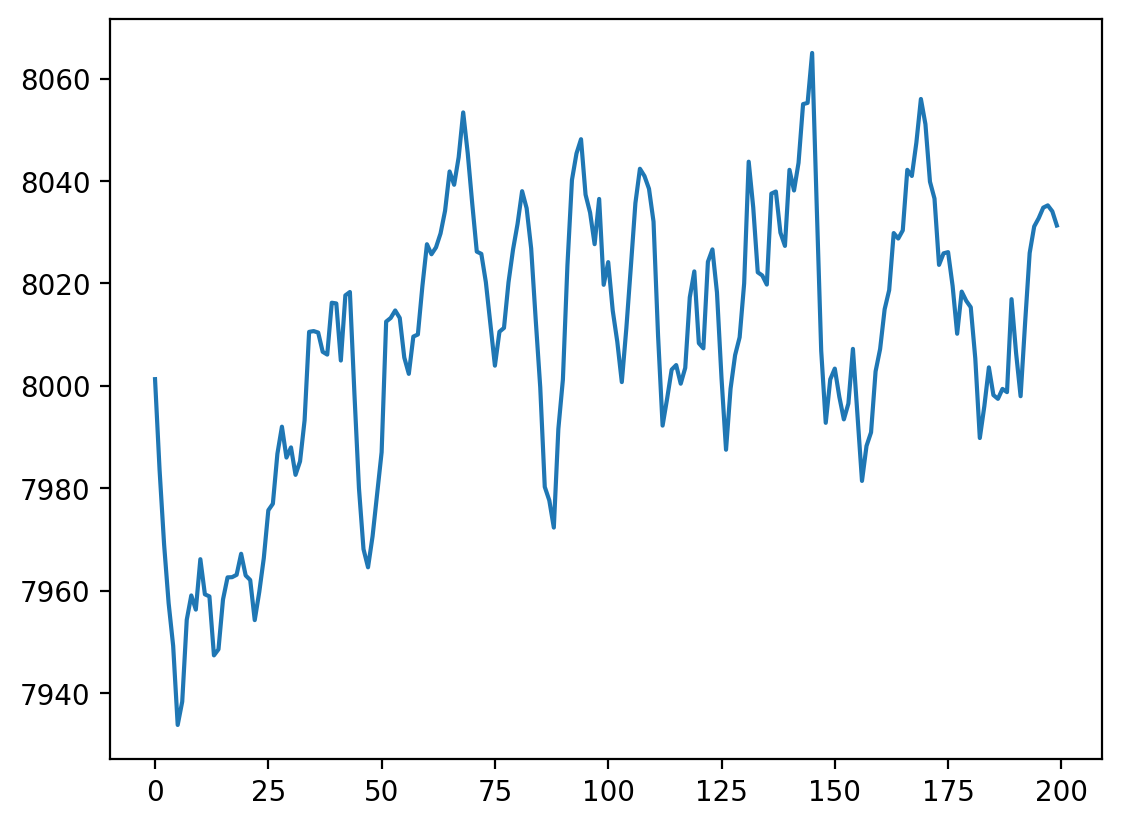

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设wave1.get_filtered_waveform()已定义
# 假设peak1是峰值列表
# 假设properties["widths"]已定义

# left_lens = 0.65 * properties["widths"]
# right_lens = 0.75 * properties["widths"]


def peak_height_from_diff(waveform, peak, left_len, right_len):
    # 计算峰值的上升区间

    rising_range_start = int(np.ceil(peak - left_len))
    rising_range_end = int(np.ceil(peak + right_len))

    # 计算区间内的波形高度
    peak_height = np.sum(np.diff(-waveform)[rising_range_start:rising_range_end])

    return peak_height


left_lens = peak1 - properties["left_ips"]
right_lens = 1.1 * (properties["right_ips"] - peak1)


# 获取filtered_waveform
filtered_waveform = wave1.get_filtered_waveform()

# 绘制filtered_waveform
plt.plot(filtered_waveform)

# 对每个峰值进行处理
for peak, left_len, right_len in zip(peak1, left_lens, right_lens):
    # 计算垂直线的起始位置
    start = int(np.round(peak - left_len))
    # 计算峰值高度
    peak_height = peak_height_from_diff(filtered_waveform, peak, left_len, right_len)
    # 绘制垂直线
    plt.vlines(
        start,
        filtered_waveform[start] - peak_height,
        filtered_waveform[start],
        color="red",
    )

# 显示图形
plt.show()

In [ ]:
import numpy as np

wave1.peaks_info

array([],
      dtype=[('position', '<i8'), ('height', '<f8'), ('integral', '<f8')])

array([[40.43177192, 45.56822808]])

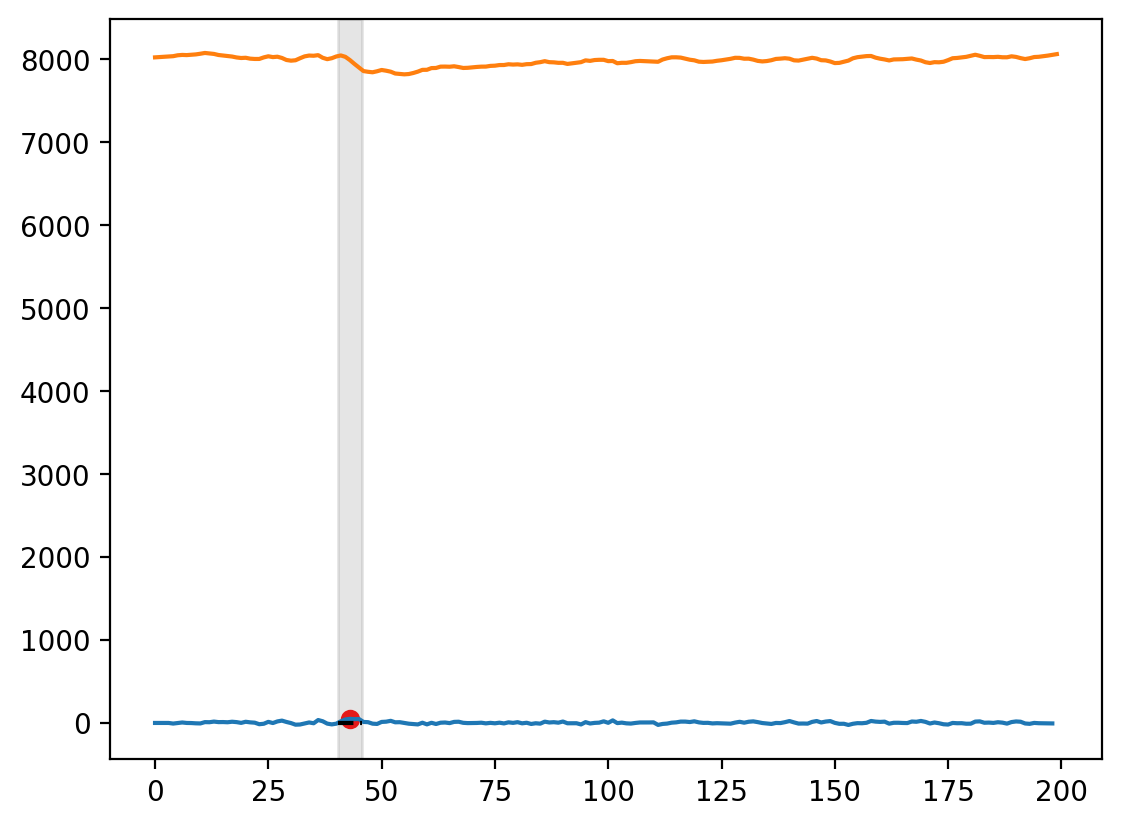

In [ ]:
plt.plot(-np.diff(wave1.get_filtered_waveform()))

peak1, properties = find_peaks(
    -np.diff(wave1.get_filtered_waveform()), height=30, distance=2, prominence=0.7, width=4
)

plt.scatter(peak1, properties["peak_heights"], color="red")


plt.plot(wave1.get_filtered_waveform())


for i, peak in enumerate(peak1):
    plt.hlines(
        0,
        peak - 0.5 * properties["widths"][i],
        peak + 0.5 * properties["widths"][i],
        color="black",
        linestyle="--",
    )

a = np.array([peak1 - 0.5 * properties["widths"], peak1 + 0.5 * properties["widths"]]).T
display(a)

for i, peak in enumerate(peak1):
    plt.axvspan(
        peak - 0.5 * properties["widths"][i],
        peak + 0.5 * properties["widths"][i],
        alpha=0.2,
        color="gray",
    )

plt.show()